##MMPose

There are many frameworks that we can use here for this purpose. I am using MMPose by OpenMMLab. Below I am trying to get poses in 2D and 3D for image and videos. This same can be extended for the asked questions which I will discuss later. The reason behind using this framework is I have some prior experience with this as I had used **MMDetection3D** for monocular detection and time to collision estimation in my master's thesis. To give you an idea, below are the  sample images from the same:

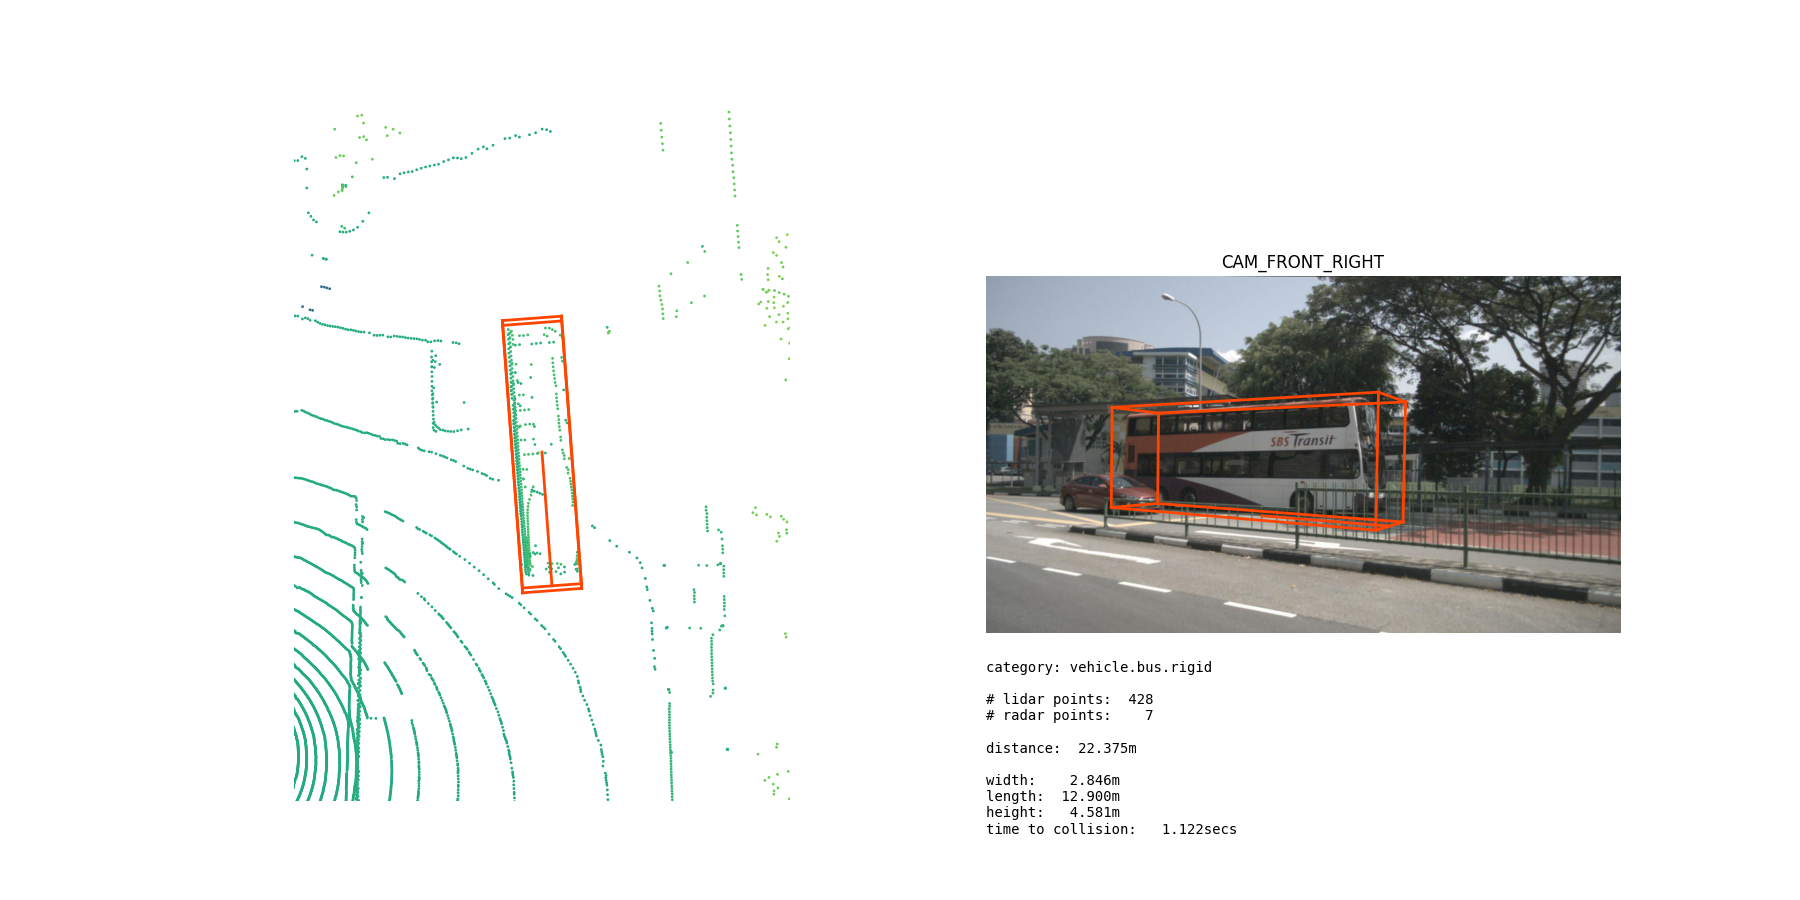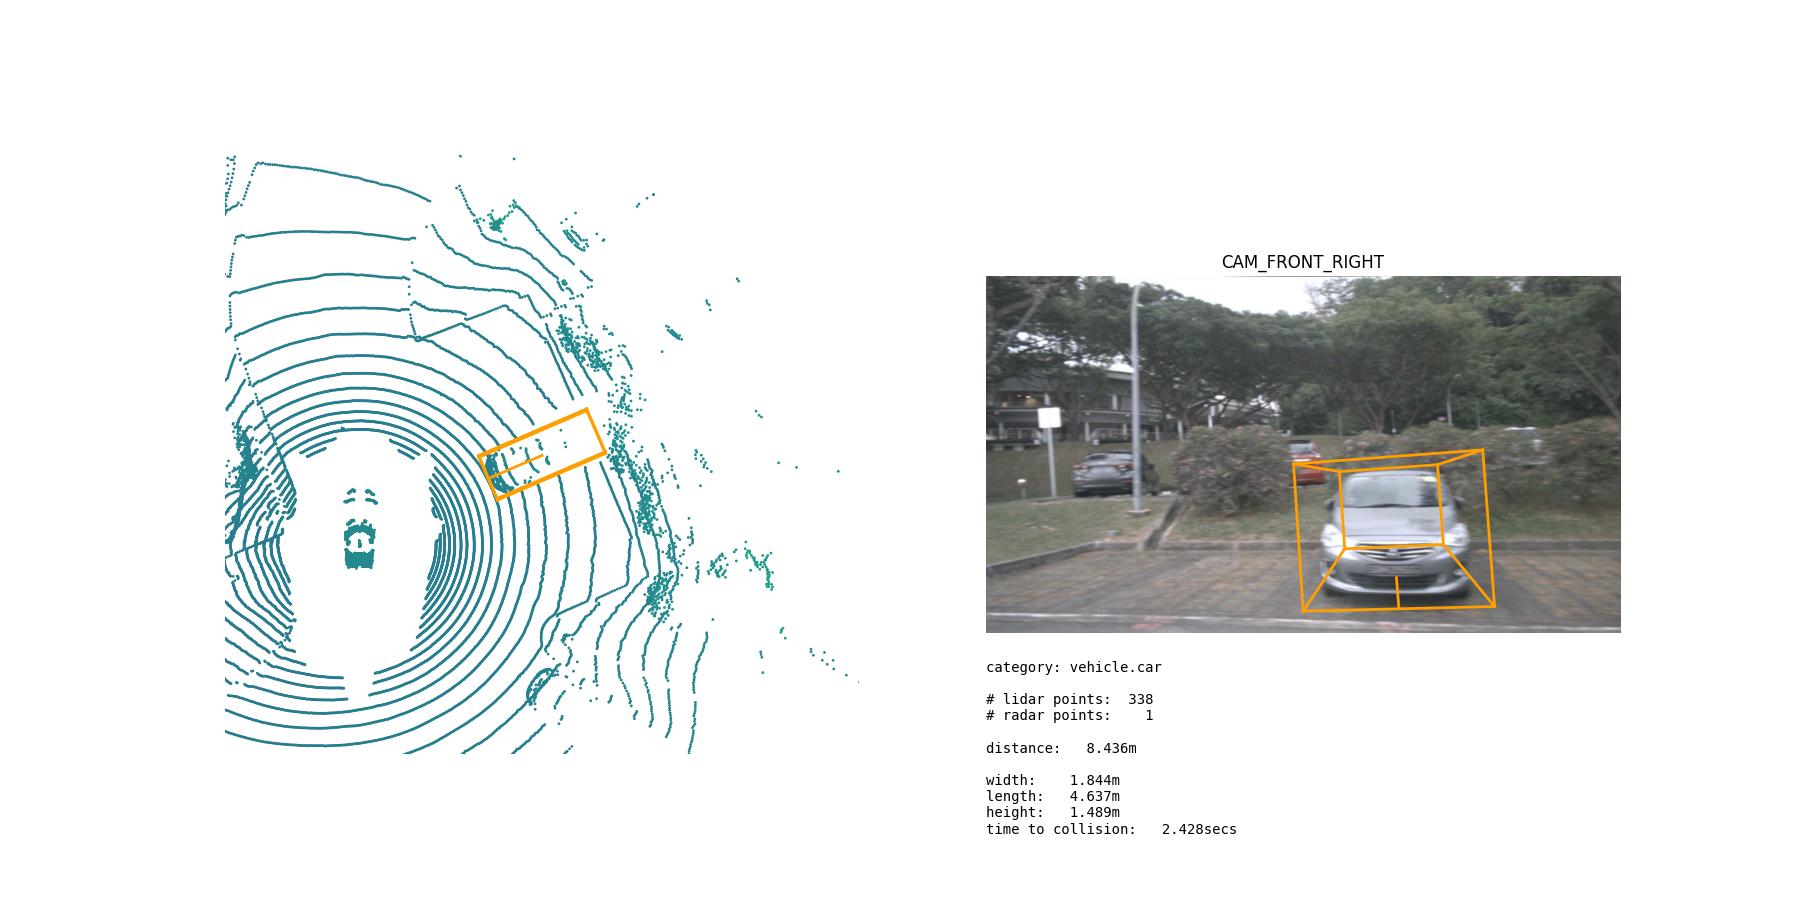

In [ ]:
!pip3 install openmim
!mim install mmengine
!mim install "mmcv>=2.0.1"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 23.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.1/295.1 kB 32.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.5/259.5 kB 26.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.4/239.4 kB 23.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.1/953.1 kB 52.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.1/77.1 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.1/143.1 kB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.7/89.7 kB 11.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.0/94.0 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━

Looking in links: https://download.openmmlab.com/mmcv/dist/cu118/torch2.0.0/index.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 437.5/437.5 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.7/254.7 kB 26.1 MB/s eta 0:00:00
Looking in links: https://download.openmmlab.com/mmcv/dist/cu118/torch2.0.0/index.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.4/74.4 MB 4.0 MB/s eta 0:00:00


In [ ]:
!pip install mmdet>=3.0

In [ ]:
!git clone https://github.com/open-mmlab/mmpose.git
%cd mmpose
# pip install -r requirements.txt
!pip install -v -e .

Cloning into 'mmpose'...
remote: Enumerating objects: 30051, done.
remote: Counting objects: 100% (712/712), done.
remote: Compressing objects: 100% (467/467), done.
remote: Total 30051 (delta 314), reused 538 (delta 238), pack-reused 29339
Receiving objects: 100% (30051/30051), 51.68 MiB | 25.18 MiB/s, done.
Resolving deltas: 100% (21212/21212), done.
/content/mmpose
Using pip 23.1.2 from /usr/local/lib/python3.10/dist-packages/pip (python 3.10)
Obtaining file:///content/mmpose
  Running command python setup.py egg_info
  running egg_info
  creating /tmp/pip-pip-egg-info-esopzkwh/mmpose.egg-info
  writing manifest file '/tmp/pip-pip-egg-info-esopzkwh/mmpose.egg-info/SOURCES.txt'
  writing manifest file '/tmp/pip-pip-egg-info-esopzkwh/mmpose.egg-info/SOURCES.txt'
  Preparing metadata (setup.py) ... done
  Cloning https://github.com/jin-s13/xtcocoapi to /tmp/pip-install-ewfz6tvg/xtcocotools_674a9e494f804d1687cac5c2d4e78edf
  Running command git version
  git version 2.34.1
  Running com

In [ ]:
import mmpose
print(mmpose.__version__)

1.1.0




---



###COCO
For inference (or training), I am using a sample image from coco dataset. There are many other datasets too which can be used for this purpose (discussed later).  

In [ ]:
%cd "/content/"
!wget -c http://images.cocodataset.org/annotations/annotations_trainval2017.zip

/content
--2023-09-25 16:00:49--  http://images.cocodataset.org/annotations/annotations_trainval2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.216.246.76, 52.216.50.97, 52.216.106.220, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|52.216.246.76|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 252907541 (241M) [application/zip]
Saving to: ‘annotations_trainval2017.zip’

annotations_trainva 100%[===================>] 241.19M  96.5MB/s    in 2.5s    

2023-09-25 16:00:52 (96.5 MB/s) - ‘annotations_trainval2017.zip’ saved [252907541/252907541]



In [ ]:
!unzip /content/annotations_trainval2017.zip

Archive:  /content/annotations_trainval2017.zip
  inflating: annotations/instances_train2017.json  
  inflating: annotations/instances_val2017.json  
  inflating: annotations/captions_train2017.json  
  inflating: annotations/captions_val2017.json  
  inflating: annotations/person_keypoints_train2017.json  
  inflating: annotations/person_keypoints_val2017.json  


In [ ]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (8.0, 10.0)

In [ ]:
# initialize COCO api for person keypoints annotations
dataDir = "/content"
dataType = "val2017"
annFile = '{}/annotations/person_keypoints_{}.json'.format(dataDir,dataType)
coco_kps=COCO(annFile)

loading annotations into memory...
Done (t=0.29s)
creating index...
index created!


In [ ]:
# initialize COCO api for instance annotations
coco=COCO(annFile)

loading annotations into memory...
Done (t=0.48s)
creating index...
index created!


In [ ]:
# display COCO categories and supercategories
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(' '.join(nms)))

nms = set([cat['supercategory'] for cat in cats])
print('COCO supercategories: \n{}'.format(' '.join(nms)))

COCO categories: 
person

COCO supercategories: 
person


In [ ]:
# get all images containing given categories, select one at random
catIds = coco.getCatIds(catNms=['person','dog','skateboard']);
# imgIds = coco.getImgIds(catIds=catIds)
imgIds = coco.getImgIds(imgIds = [324158])
images = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])
img = images[0]

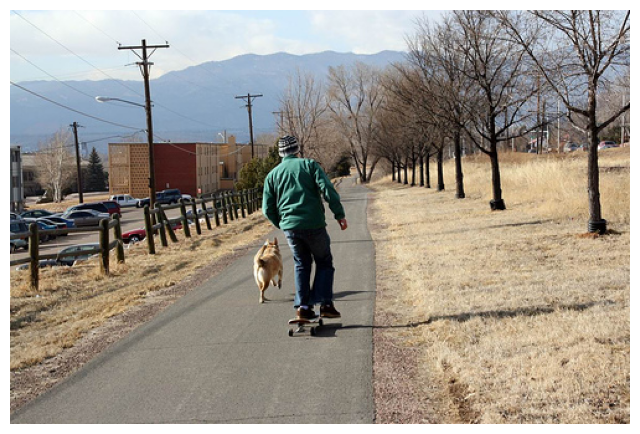

In [ ]:
# load and display image
# I = io.imread('%s/images/%s/%s'%(dataDir,dataType,img['file_name']))
# use url to load image
I = io.imread(img['coco_url'])
plt.axis('off')
plt.imshow(I)
plt.show()